<a href="https://colab.research.google.com/github/Rogercaste/MATXINLERNIN/blob/master/Auxiliar_Final_Report_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Starting: Imports, modules, and paths

In [ ]:
# Drive Mount:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installs:
!pip install hsemotion
!pip install moviepy
!pip3 install imageio==2.4.1
!pip install --upgrade imageio-ffmpeg


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.8 MB/s eta 0:00:00
  Created wheel for hsemotion: filename=hsemotion-0.3.0-py3-none-any.whl size=11242 sha256=c943aaf0044f072bcecde847f937cc3bbe03bb62047a667eb3bb521a73ad6578
  Stored in directory: /root/.cache/pip/wheels/38/88/e0/3b365122443c2ec55f3e058f2b7ad59df7b5e302c457c4539a
Successfully built hsemotion
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created w

In [ ]:
# Imports:
import cv2
import numpy as np
from hsemotion.facial_emotions import HSEmotionRecognizer
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from matplotlib.lines import Line2D
from matplotlib import colors
import moviepy.editor

Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x7fadb9423f40>
Traceback (most recent call last):
  File "/usr/lib/python3.10/_weakrefset.py", line 39, in _remove
    def _remove(item, selfref=ref(self)):
KeyboardInterrupt: 


In [ ]:
# Path video:
path_video = "/content/drive/MyDrive/Felicitat_10.mp4"

In [ ]:
color_palette = ['red', 'lawngreen', 'indigo', 'orange', 'gray', 'dodgerblue', 'hotpink']

# Emotions from image source:

## Subtracting frames from video

In [ ]:
video = cv2.VideoCapture(path_video)

# We get the video duration:
fps = video.get(cv2.CAP_PROP_FPS)
total_Frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
duration = total_Frames/fps

# Function to get frames (i.e., access the video at a given time, in seconds, 
# and get the image):
def getFrame(video, sec):
    video.set(cv2.CAP_PROP_POS_MSEC, sec*1000)
    hasFrames, image = video.read()
    image = cv2.rotate(image, cv2.ROTATE_180) # The images seem to be rotated :o.
    return(image)

# Starting at second zero:
sec = 0

# We choose a frame rate of 0.5, meaning that the function will capture an image 
# from the video in each 0.5 seconds interval (2 images per second):
frameRate = 0.5 

# We will iterativelly append each image in the frame_list, initially empty:
frame_list = []
while sec <= duration:
  new_frame = getFrame(video, sec) # Getting the frame.
  frame_list.append(new_frame) # Appending it to the list.
  sec = sec + frameRate
  sec = round(sec, 2)

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from typing import Tuple, Optional

import math
from typing import List, Tuple
#from .padding import pad_same, get_padding_value

# Dynamically pad input x with 'SAME' padding for conv with specified args
def pad_same(x, k: List[int], s: List[int], d: List[int] = (1, 1), value: float = 0):
    ih, iw = x.size()[-2:]
    pad_h, pad_w = get_same_padding(ih, k[0], s[0], d[0]), get_same_padding(iw, k[1], s[1], d[1])
    if pad_h > 0 or pad_w > 0:
        x = F.pad(x, [pad_w // 2, pad_w - pad_w // 2, pad_h // 2, pad_h - pad_h // 2], value=value)
    return x

# Calculate asymmetric TensorFlow-like 'SAME' padding for a convolution
def get_same_padding(x: int, k: int, s: int, d: int):
    return max((math.ceil(x / s) - 1) * s + (k - 1) * d + 1 - x, 0)

def get_padding_value(padding, kernel_size, **kwargs) -> Tuple[Tuple, bool]:
    dynamic = False
    if isinstance(padding, str):
        # for any string padding, the padding will be calculated for you, one of three ways
        padding = padding.lower()
        if padding == 'same':
            # TF compatible 'SAME' padding, has a performance and GPU memory allocation impact
            if is_static_pad(kernel_size, **kwargs):
                # static case, no extra overhead
                padding = get_padding(kernel_size, **kwargs)
            else:
                # dynamic 'SAME' padding, has runtime/GPU memory overhead
                padding = 0
                dynamic = True
        elif padding == 'valid':
            # 'VALID' padding, same as padding=0
            padding = 0
        else:
            # Default to PyTorch style 'same'-ish symmetric padding
            padding = get_padding(kernel_size, **kwargs)
    return padding, dynamic

def conv2d_same(
        x, weight: torch.Tensor, bias: Optional[torch.Tensor] = None, stride: Tuple[int, int] = (1, 1),
        padding: Tuple[int, int] = (0, 0), dilation: Tuple[int, int] = (1, 1), groups: int = 1):
    x = pad_same(x, weight.shape[-2:], stride, dilation)
    return F.conv2d(x, weight, bias, stride, (0, 0), dilation, groups)


class Conv2dSame(nn.Conv2d):
    """ Tensorflow like 'SAME' convolution wrapper for 2D convolutions
    """

    def __init__(self, in_channels, out_channels, kernel_size, stride=1,
                 padding=0, dilation=1, groups=1, bias=True):
        super(Conv2dSame, self).__init__(
            in_channels, out_channels, kernel_size, stride, 0, dilation, groups, bias)

    def forward(self, x):
        return conv2d_same(x, self.weight, self.bias, self.stride, self.padding, self.dilation, self.groups)


def create_conv2d_pad(in_chs, out_chs, kernel_size, **kwargs):
    padding = kwargs.pop('padding', '')
    kwargs.setdefault('bias', False)
    padding, is_dynamic = get_padding_value(padding, kernel_size, **kwargs)
    if is_dynamic:
        return Conv2dSame(in_chs, out_chs, kernel_size, **kwargs)
    else:
        return nn.Conv2d(in_chs, out_chs, kernel_size, padding=padding, **kwargs)

## Image emotion predictions

In [ ]:
# We get the total number of images captured (i.e., the length of the 
# frame_list):
num_considered_frames = int(len(frame_list))

# For each element in frame_list, we compute the emotions. The maximum value 
# each independent emotion can have is 1, an the minimum, 0. We sum each 
# independent emotion result to the overall emotional result.

# The overall emotion results is a vector of the form:
# ['Anger1', 'Anger2', ..., 'AngerN'; 
#  'Disgust1', Disgust2', ..., DisgustN':
#  'Fear1', 'Fear2', ..., 'FearN';
#  'Happiness1', 'Happiness2', ..., 'HappinessN';
#  'Neutral1', 'Neutral2', ..., 'NeutralN';
#  'Sadness1', 'Sadness2', ..., 'SadnessN';
#  'Surprise1', 'Surprise2', ..., 'SurpriseN']
all_emotions = np.zeros((7,num_considered_frames))

# We will work with the 7 emotions' model (the one with best performance):
model_name = 'enet_b2_7'
f_emo_reco = HSEmotionRecognizer(model_name = model_name, device='cpu')

# We set the loop and predict:
column_count = 0
for image in frame_list:
  emotion, scores = f_emo_reco.predict_emotions(image, logits = False) # logits = False for ranges between 0 and 1.
  scores = np.asarray(scores, dtype = np.float32)
  all_emotions[:, column_count] = scores # Adding to overall emotions.
  column_count = column_count + 1

# Getting the mean value of each emotion:
mean_all_emotions = np.zeros((7))
for i in range(7):
  single_emotion = all_emotions[i,:]
  single_mean = np.mean(single_emotion)
  mean_all_emotions[i] = single_mean

# And the same for the standard deviation (SD):
SD_all_emotions = np.zeros((7))
for i in range(7):
  single_emotion = all_emotions[i,:]
  single_SD = np.std(single_emotion)
  SD_all_emotions[i] = single_SD

ModuleNotFoundError: ignored

## Particular plots of image analysis:

### Mean and std bar plot of each emotion

NameError: ignored

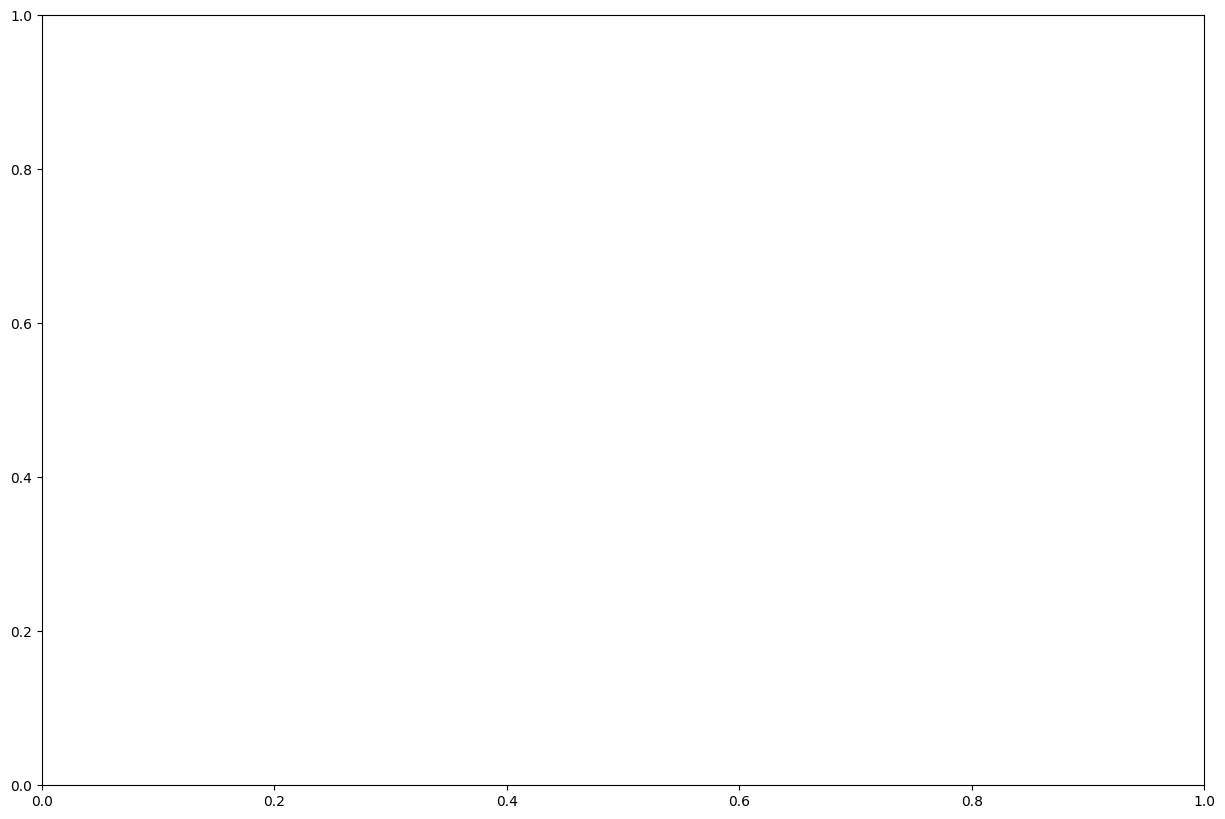

In [ ]:
# Each bar of the plot corresponds to the mean of every emotion in the video:
plt.rcParams["figure.figsize"] = (15,10) 

F, ax = plt.subplots()
plt.bar(np.arange(5,40,5), mean_all_emotions, yerr = SD_all_emotions, align = 'center', width = 2.2, color = color_palette, alpha = 0.7, ecolor = 'black', capsize = 4)
custom_legend = [Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[0], alpha = 0.7, markersize=15, label="Anger"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[1], alpha = 0.7, markersize=15, label="Disgust"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[2], alpha = 0.7, markersize=15, label="Fear"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[3], alpha = 0.7, markersize=15, label="Happiness"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[4], alpha = 0.7, markersize=15, label="Neutral"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[5], alpha = 0.7, markersize=15, label="Sadness"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[6], alpha = 0.7, markersize=15, label="Surprise")]
ax.legend(handles = custom_legend, prop = {'size': 15})

plt.xlabel("Emotions", fontsize = 28)
plt.ylabel("Emotion intensity", fontsize = 28)
plt.title("Emotional $\mu$ and $\sigma$ captured in video images", fontsize = 35)
plt.ylim([0,1])
ax.axes.xaxis.set_ticklabels([])
plt.savefig("/content/drive/MyDrive/bar_emotions.png")
plt.show()

# We reset the figure size:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

### Line plot of emotions during the image sequences

AttributeError: ignored

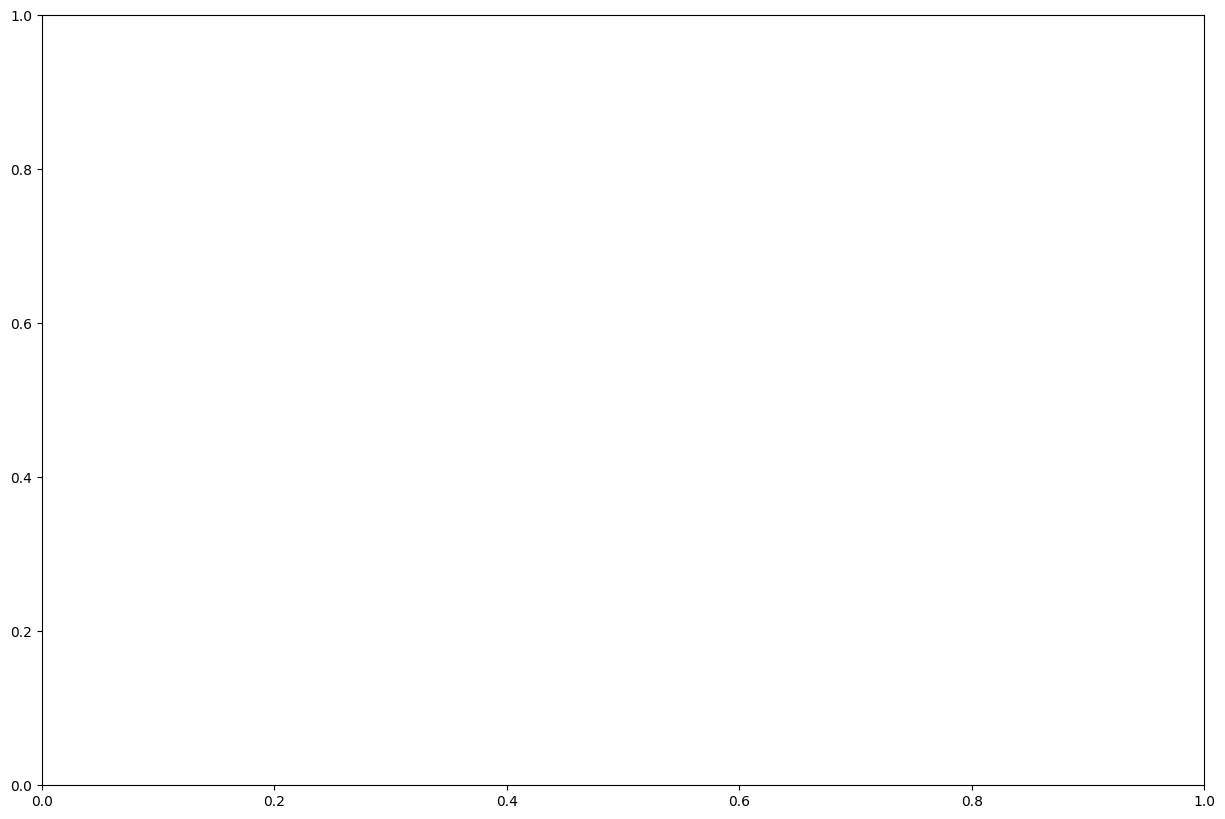

In [39]:
# Each line in the plot corresponds to the value of each captured emotion 
# during the video, so some sort of emotional progression during it can be seen:
plt.rcParams["figure.figsize"] = (15,10)
F,ax = plt.subplots()
for i in range(7):
  plt.plot(np.arange(num_considered_frames), all_emotions[i,:],  'o-', color = color_palette[i], alpha = 0.7, LineWidth = 4)
plt.xlabel("Video frame", fontsize = 15)
plt.xticks(np.arange(num_considered_frames))
plt.ylabel("Emotion intensity", fontsize = 15)
plt.title("Emotion progression in video", fontsize = 25)
plt.ylim([0,1])
custom_legend = [Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[0], alpha = 0.7, markersize=15, label="Anger"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[1], alpha = 0.7, markersize=15, label="Disgust"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[2], alpha = 0.7, markersize=15, label="Fear"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[3], alpha = 0.7, markersize=15, label="Happiness"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[4], alpha = 0.7, markersize=15, label="Neutral"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[5], alpha = 0.7, markersize=15, label="Sadness"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[6], alpha = 0.7, markersize=15, label="Surprise")]
ax.legend(handles = custom_legend, prop = {'size': 12})

plt.savefig("/content/drive/MyDrive/line_emotions.png")
plt.show()

### Image frames dominant emotion plot

In [ ]:
# We want to make a plot in a similar manner that the one above, but with the 
# exception of showing which emotion is the most relevant in each frame, as well 
# as displaying frame miniatures in each case.

# To do so, we create a matrix:
emotion_matrix = np.zeros((round(num_considered_frames/2.5),num_considered_frames))
for row_emotions in range(all_emotions.shape[1]):
  emotions_frame = all_emotions[:,row_emotions]
  emotion_matrix[:,row_emotions] = int(np.where(emotions_frame == np.max(emotions_frame))[0])

# Creating the matrix color map:
cmap = colors.ListedColormap(color_palette)

# Image representation:
plt.rcParams["figure.figsize"] = (15,10)

F, ax = plt.subplots()
plt.imshow(emotion_matrix, cmap = cmap, alpha = 0.7, vmin = 0, vmax = 6)

for j in range(num_considered_frames):
  plt.axvline(x = int(j), color = 'black', linestyle = '--', alpha = 0.8)

for i in range(num_considered_frames):
  icon = frame_list[i]
  icon = cv2.cvtColor(icon, cv2.COLOR_BGR2RGB)
  imagebox = OffsetImage(icon, zoom = 0.035)
  ab = AnnotationBbox(imagebox, (i, 0.5), frameon = False)
  ax.add_artist(ab)

plt.xlim([-1,num_considered_frames])
plt.title("Dominant emotion per frame", fontsize = 25)
plt.axis("off")
custom_legend = [Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[0], alpha = 0.7, markersize=15, label="Anger"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[1], alpha = 0.7, markersize=15, label="Disgust"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[2], alpha = 0.7, markersize=15, label="Fear"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[3], alpha = 0.7, markersize=15, label="Happiness"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[4], alpha = 0.7, markersize=15, label="Neutral"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[5], alpha = 0.7, markersize=15, label="Sadness"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[6], alpha = 0.7, markersize=15, label="Surprise")]
ax.legend(handles = custom_legend, loc = "lower right", prop = {'size': 8})

plt.savefig("/content/drive/MyDrive/matrix_emotions.png")
plt.show()


TypeError: ignored

# Emotions from audio source:

## Subtracting audio from video

In [ ]:
# For audio subtraction, the video must be subtracted using the moviepy module:
video = moviepy.editor.VideoFileClip(path_video)
audio = video.audio
# Creo que con estas pocas líneas ya tendrás el audio :)

## Audio emotion predictions:

In [ ]:



mean_audio = np.zeros((7))



## Particular plots of audio analysis:

# Combined prediction:

NameError: ignored

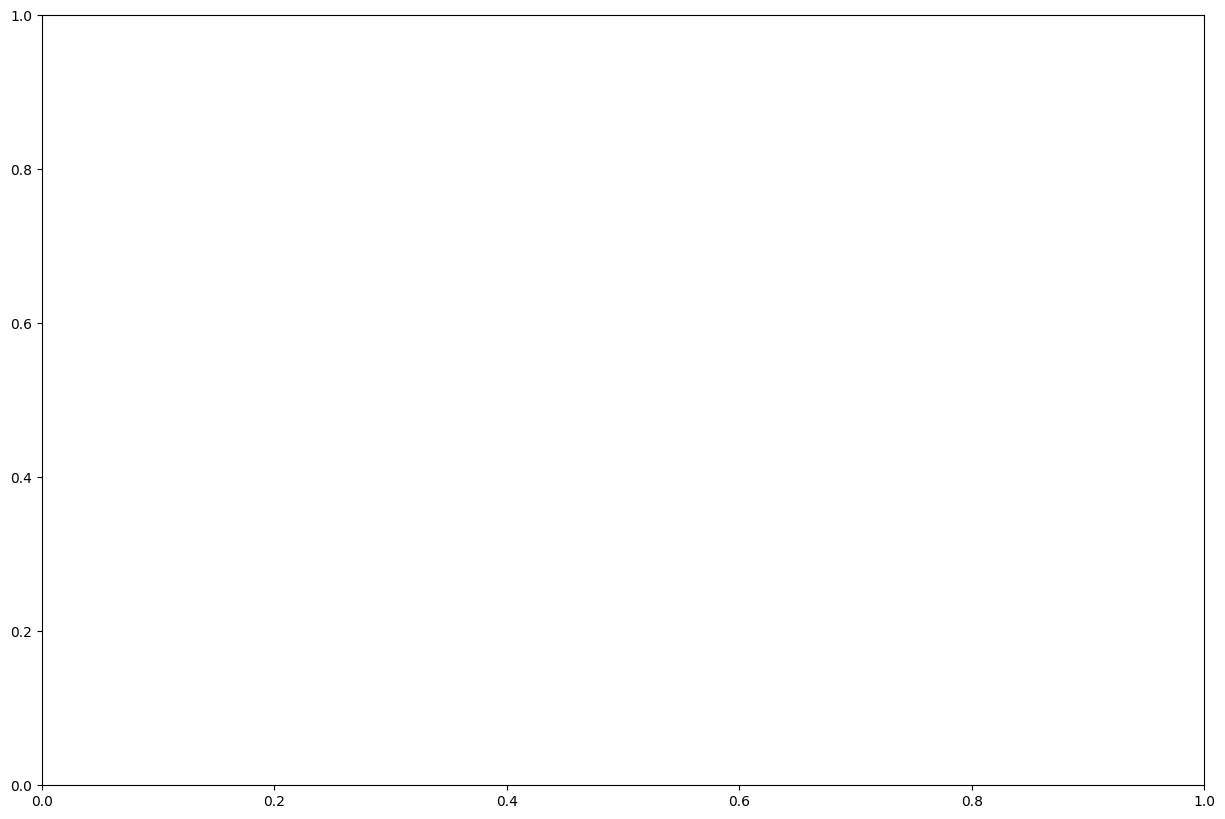

In [40]:

# Each bar of the plot corresponds to the averaged mean of every emotion in the 
# video:
plt.rcParams["figure.figsize"] = (15,10) 

F, ax = plt.subplots()
plt.bar(np.arange(5,40,5), combined_mean_emotions, align = 'center', width = 2.2, color = color_palette, alpha = 0.7)
custom_legend = [Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[0], alpha = 0.7, markersize=15, label="Anger"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[1], alpha = 0.7, markersize=15, label="Disgust"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[2], alpha = 0.7, markersize=15, label="Fear"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[3], alpha = 0.7, markersize=15, label="Happiness"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[4], alpha = 0.7, markersize=15, label="Neutral"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[5], alpha = 0.7, markersize=15, label="Sadness"),
                 Line2D([0], [0], marker='o', color='white', markerfacecolor=color_palette[6], alpha = 0.7, markersize=15, label="Surprise")]
ax.legend(handles = custom_legend, prop = {'size': 15})

plt.xlabel("Emotions", fontsize = 28)
plt.ylabel("Averaged emotion prediction", fontsize = 28)
plt.title("Average emotions captured in video (combined prediction)", fontsize = 35)
plt.ylim([0,1])
ax.axes.xaxis.set_ticklabels([])
plt.savefig("/content/drive/MyDrive/average_bar_emotions.png")
plt.show()

# We reset the figure size:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]